# Installing dependecies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
tf.random.set_seed(3) #when set to particular number, the calculation becomes same each time we run model
from tensorflow import keras
import os
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD


# Loading datasets

Circle images:


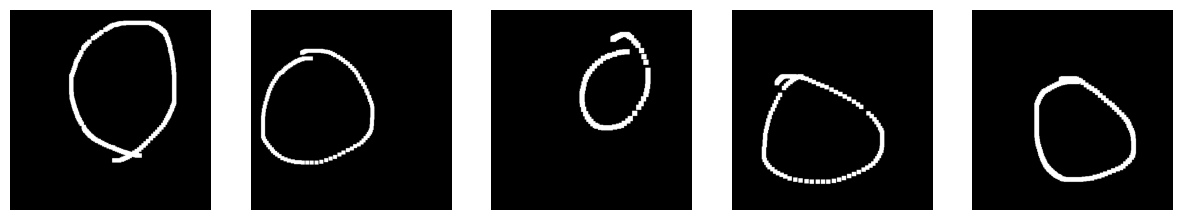


Square images:


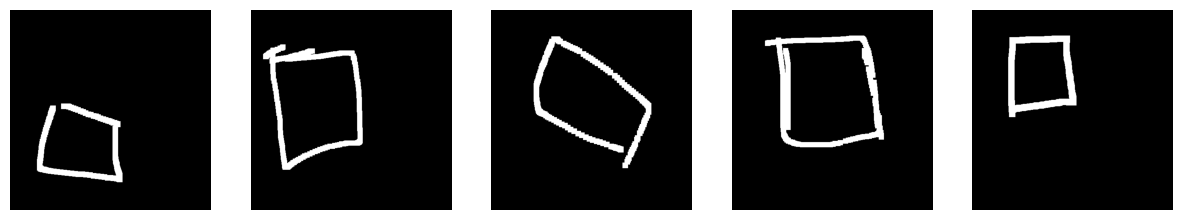


Triangle images:


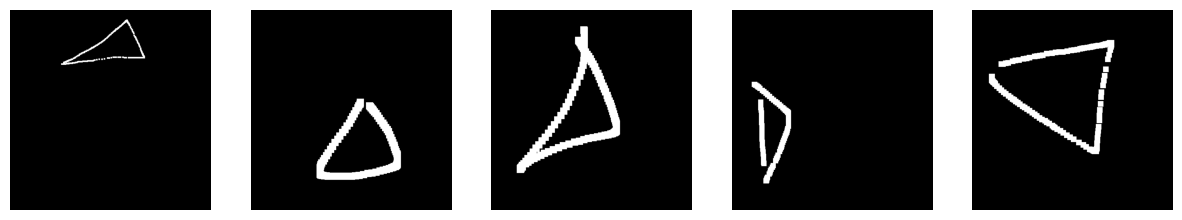


 Line images:


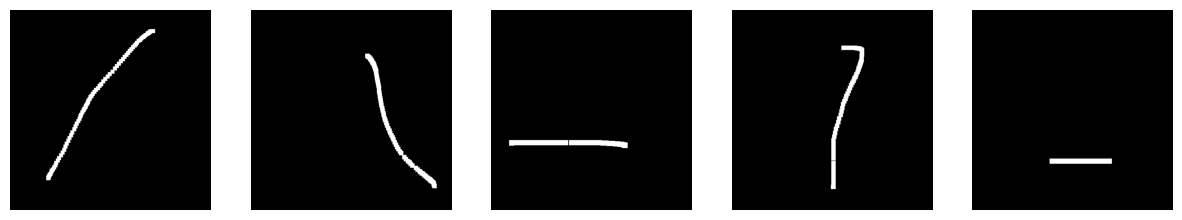

In [2]:
data_folder = 'shape_dataset'
circle_folder = os.path.join(data_folder, 'circle')
square_folder = os.path.join(data_folder, 'square')
triangle_folder = os.path.join(data_folder, 'triangle')
line_folder = os.path.join(data_folder, 'line')

circle_files = os.listdir(circle_folder)
square_files = os.listdir(square_folder)
triangle_files = os.listdir(triangle_folder)
line_files = os.listdir(line_folder)

# Select random 5 circle images
circle_random_files = random.sample(circle_files, 5)
print("Circle images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, file in enumerate(circle_random_files):
    file_path = os.path.join(circle_folder, file)
    img = mpimg.imread(file_path)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

# Select random 5 square images
square_random_files = random.sample(square_files, 5)
print("\nSquare images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, file in enumerate(square_random_files):
    file_path = os.path.join(square_folder, file)
    img = mpimg.imread(file_path)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

# Select random 5 triangle images
triangle_random_files = random.sample(triangle_files, 5)
print("\nTriangle images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, file in enumerate(triangle_random_files):
    file_path = os.path.join(triangle_folder, file)
    img = mpimg.imread(file_path)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

# Select random 5 line images
line_random_files = random.sample(line_files, 5)
print("\n Line images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, file in enumerate(line_random_files):
    file_path = os.path.join(line_folder, file)
    img = mpimg.imread(file_path)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

Preprocessed Circle Images:


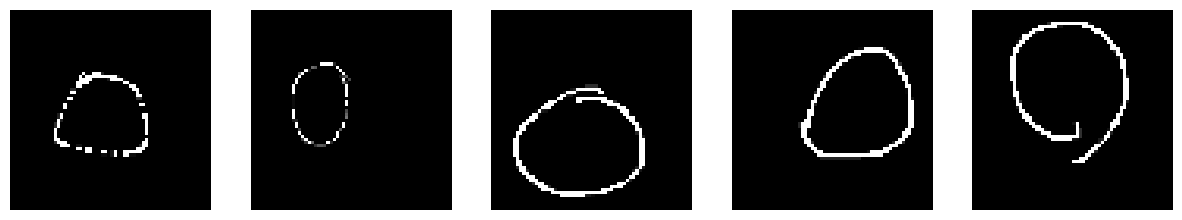


Augmented Images:


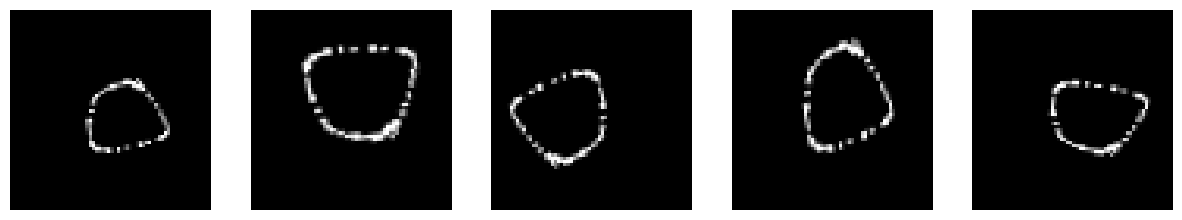

In [3]:
from skimage import exposure
# Function to preprocess images
def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Resize the image to a fixed size
    img = cv2.resize(img, (64, 64))
    
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Normalize pixel values to be between 0 and 1
    img = img / 255.0
    
    # Apply histogram equalization for contrast enhancement
    img = exposure.equalize_hist(img)
    
    return img

# Select random 5 images for display
circle_files = os.listdir(circle_folder)
circle_random_files = random.sample(circle_files, 5)

# Preprocess and display the images for circle category
print("Preprocessed Circle Images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, file in enumerate(circle_random_files):
    file_path = os.path.join(circle_folder, file)
    img = preprocess_image(file_path)
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
plt.show()

# Preprocess and perform data augmentation
# Define the augmentation parameters for the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,              # Randomly rotate the images within the range of -20 to +20 degrees
    width_shift_range=0.1,          # Randomly shift the width of the images by a maximum of 0.1 times the total width
    height_shift_range=0.1,         # Randomly shift the height of the images by a maximum of 0.1 times the total height
    shear_range=0.2,                # Randomly shear the images within the range of -0.2 to +0.2 radians
    zoom_range=0.2,                 # Randomly zoom into the images by a factor of up to 0.2
    horizontal_flip=True,           # Randomly flip the images horizontally
    vertical_flip=True,             # Randomly flip the images vertically
    fill_mode='nearest'             # Fill any newly created pixels after rotation or shifting with the nearest pixel value
)

# Load an example image for preprocessing and data augmentation
example_image_path = os.path.join(circle_folder, circle_random_files[0])
example_image = preprocess_image(example_image_path)
example_image = np.expand_dims(example_image, axis=2)
example_image = np.expand_dims(example_image, axis=0)

# Generate augmented images
augmented_images = datagen.flow(example_image, batch_size=5)

# Display augmented images
print("\nAugmented Images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    augmented_image = augmented_images.next()[0]
    axs[i].imshow(augmented_image[:, :, 0], cmap='gray')
    axs[i].axis('off')
plt.show()

In [4]:
# Load and preprocess images
data_folder = 'shape_dataset'
categories = ['circle', 'square', 'triangle','line']
num_classes = len(categories)
input_shape = (64, 64, 1)  # As images are resized to 64x64 during preprocessin
images = []
labels = []


for category_id, category in enumerate(categories):
    folder_path = os.path.join(data_folder, category)
    files = os.listdir(folder_path)
    
    for file in files:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, input_shape[:2])
        img = img / 255.0
        images.append(img)
        labels.append(category_id)

# # Convert data to NumPy arrays
images = np.array(images).reshape(-1, *input_shape)
labels = to_categorical(labels, num_classes)

# # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Create the CNN model
model1 = Sequential()
# Add the first convolutional layer
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# Add the second convolutional layer
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# Add the third convolutional layer
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# Add the fourth convolutional layer
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output from convolutional layers
model1.add(Flatten())
# Add a fully connected layer
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
# Add the output layer
model1.add(Dense(num_classes, activation='softmax'))
# sgd = SGD(learning_rate=0.0001, momentum=0.5)

# Compile the model
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
    metrics=[
        metrics.CategoricalAccuracy(),
#         metrics.AUC(),
    ]
)


# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history1 = model1.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=25,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)

Epoch 1/25
138/138 [==============================] - 18s 120ms/step - loss: 1.0974 - categorical_accuracy: 0.4899 - val_loss: 0.6876 - val_categorical_accuracy: 0.7179
Epoch 2/25
138/138 [==============================] - 15s 111ms/step - loss: 0.6261 - categorical_accuracy: 0.7429 - val_loss: 0.3136 - val_categorical_accuracy: 0.8843
Epoch 3/25
138/138 [==============================] - 20s 142ms/step - loss: 0.4491 - categorical_accuracy: 0.8274 - val_loss: 0.2895 - val_categorical_accuracy: 0.8901
Epoch 4/25
138/138 [==============================] - 16s 117ms/step - loss: 0.3596 - categorical_accuracy: 0.8664 - val_loss: 0.2195 - val_categorical_accuracy: 0.9208
Epoch 5/25
138/138 [==============================] - 16s 114ms/step - loss: 0.2809 - categorical_accuracy: 0.8931 - val_loss: 0.1460 - val_categorical_accuracy: 0.9503
Epoch 6/25
138/138 [==============================] - 15s 106ms/step - loss: 0.2481 - categorical_accuracy: 0.9110 - val_loss: 0.2045 - val_categorical_acc

60/60 [==============================] - 1s 23ms/step - loss: 0.0308 - categorical_accuracy: 0.9868
Test Loss: 0.0308
Test Categorical Accuracy: 0.9868
60/60 [==============================] - 2s 23ms/step
Precision: 0.9868
Recall: 0.9868
F1-Score: 0.9868
Accuracy: 0.9868


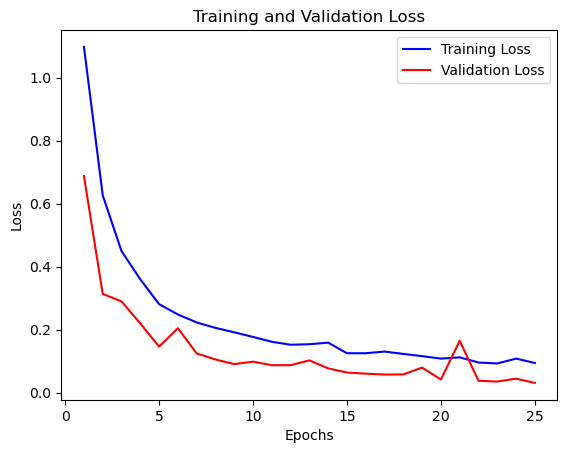

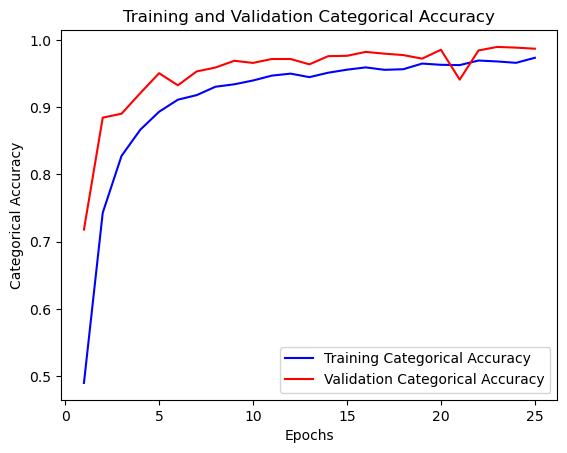

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Evaluate the model
evaluation_results = model1.evaluate(X_test, y_test)
test_loss = evaluation_results[0]
test_categorical_accuracy = evaluation_results[1]
# test_auc = evaluation_results[2]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Categorical Accuracy: {test_categorical_accuracy:.4f}")
# print(f"Test AUC: {test_auc:.4f}")

# Predict the classes on the test set
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate additional evaluation metrics
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Plot the training and validation metrics
epochs = range(1, len(history1.history['loss']) + 1)

plt.plot(epochs, history1.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, history1.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, history1.history['categorical_accuracy'], 'b', label='Training Categorical Accuracy')
plt.plot(epochs, history1.history['val_categorical_accuracy'], 'r', label='Validation Categorical Accuracy')
plt.title('Training and Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.legend()
plt.show()

# plt.plot(epochs, history1.history['auc'], 'b', label='Training AUC')
# plt.plot(epochs, history1.history['val_auc'], 'r', label='Validation AUC')
# plt.title('Training and Validation AUC')
# plt.xlabel('Epochs')
# plt.ylabel('AUC')
# plt.legend()
# plt.show()



In [6]:
# # Print the training and validation metrics for each epoch
# for epoch in range(len(history1.history['loss'])):
#     train_loss = history1.history['loss'][epoch]
#     val_loss = history1.history['val_loss'][epoch]
#     train_accuracy = history1.history['categorical_accuracy'][epoch]
#     val_accuracy = history1.history['val_categorical_accuracy'][epoch]
    
#     print(f"Epoch {epoch + 1}:")
#     print(f"Training Loss: {train_loss:.4f}")
#     print(f"Validation Loss: {val_loss:.4f}")
#     print(f"Training Categorical Accuracy: {train_accuracy:.4f}")
#     print(f"Validation Categorical Accuracy: {val_accuracy:.4f}")
#     print()


In [7]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# # Calculate additional evaluation metrics
# precision = precision_score(y_true, y_pred_classes, average='weighted')
# recall = recall_score(y_true, y_pred_classes, average='weighted')
# f1 = f1_score(y_true, y_pred_classes, average='weighted')
# accuracy = accuracy_score(y_true, y_pred_classes)

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-Score: {f1:.4f}")
# print(f"Accuracy: {accuracy:.4f}")

# # Create a bar plot for evaluation metrics
# metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
# values = [precision, recall, f1, accuracy]

# plt.bar(metrics, values)
# plt.title('Evaluation Metrics')
# plt.ylabel('Score')
# plt.ylim(0, 1)  # Adjust the y-axis range if needed
# plt.show()


In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

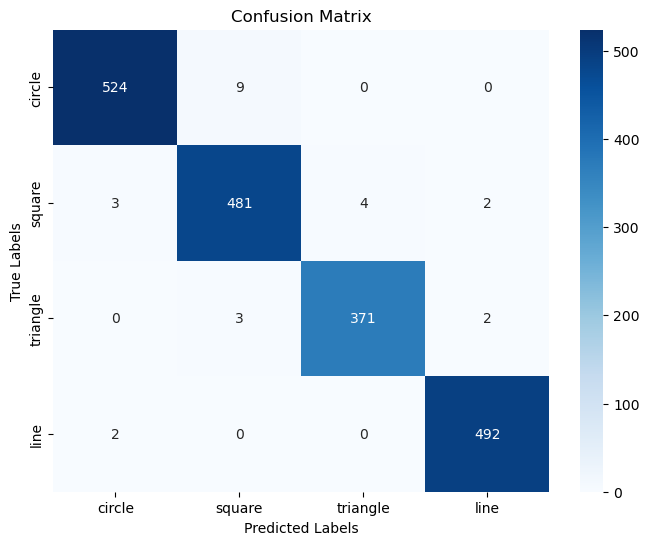

In [9]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [10]:
# precision = precision_score(y_true, y_pred_classes, average='weighted')
# recall = recall_score(y_true, y_pred_classes, average='weighted')
# f1 = f1_score(y_true, y_pred_classes, average='weighted')
# accuracy = accuracy_score(y_true, y_pred_classes)

# # Plot precision, recall, F1-score, and accuracy over epochs
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, [precision] * len(epochs), 'b', label='Precision')
# plt.plot(epochs, [recall] * len(epochs), 'g', label='Recall')
# plt.plot(epochs, [f1] * len(epochs), 'orange', label='F1-Score')
# plt.plot(epochs, [accuracy] * len(epochs), 'r', label='Accuracy')
# plt.title('Metrics Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Metric Value')
# plt.legend()
# plt.grid()
# plt.show()

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# # Your evaluation results and predictions here...
# # (You can use the code snippets you provided earlier)

# # Calculate additional evaluation metrics
# precision = precision_score(y_true, y_pred_classes, average='weighted')
# recall = recall_score(y_true, y_pred_classes, average='weighted')
# f1 = f1_score(y_true, y_pred_classes, average='weighted')
# accuracy = accuracy_score(y_true, y_pred_classes)

# # Collect metrics over epochs from history
# precision_values = history1.history['precision']  # Assuming you have these metrics in your history
# recall_values = history1.history['recall']
# f1_values = history1.history['f1']
# accuracy_values = history1.history['accuracy']

# # Plot precision, recall, F1-score, and accuracy over epochs
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, precision_values, 'b', label='Precision')
# plt.plot(epochs, recall_values, 'g', label='Recall')
# plt.plot(epochs, f1_values, 'orange', label='F1-Score')
# plt.plot(epochs, accuracy_values, 'r', label='Accuracy')
# plt.title('Metrics Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Metric Value')
# plt.legend()
# plt.grid()
# plt.show()


In [12]:
# # Evaluate the model
# # Evaluate the model
# loss = model1.evaluate(X_test, y_test)
# print(f"Test Loss: {loss:.4f}")

# validation_accuracy = history1.history['val_accuracy']
# last_epoch_validation_accuracy = validation_accuracy[-1]
# print(f"Validation Accuracy: {last_epoch_validation_accuracy:.4f}")


In [13]:
# # Evaluate the model
# evaluation_results = model1.evaluate(X_test, y_test)
# mse = evaluation_results[1]  # Mean Squared Error
# print(f"Test Mean Squared Error: {mse:.4f}")


In [14]:
# auc = evaluation_results[2]  # AUC
# print(f"Test AUC: {auc:.4f}")


In [15]:
# # Retrieve the loss values and metric values from the training history
# train_loss1 = history1.history['loss']
# val_loss1 = history1.history['val_loss']
# train_mse1 = history1.history['mean_squared_error']
# val_mse1 = history1.history['val_mean_squared_error']
# train_auc1 = history1.history['auc']
# val_auc1 = history1.history['val_auc']

# # Plot the training and validation loss
# epochs = range(1, len(train_loss1) + 1)
# plt.plot(epochs, train_loss1, 'b', label='Training Loss')
# plt.plot(epochs, val_loss1, 'r', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Plot the training and validation Mean Squared Error
# plt.plot(epochs, train_mse1, 'b', label='Training MSE')
# plt.plot(epochs, val_mse1, 'r', label='Validation MSE')
# plt.title('Training and Validation Mean Squared Error')
# plt.xlabel('Epochs')
# plt.ylabel('MSE')
# plt.legend()
# plt.show()

# # Plot the training and validation AUC
# plt.plot(epochs, train_auc1, 'b', label='Training AUC')
# plt.plot(epochs, val_auc1, 'r', label='Validation AUC')
# plt.title('Training and Validation AUC')
# plt.xlabel('Epochs')
# plt.ylabel('AUC')
# plt.legend()
# plt.show()


In [16]:
# # Retrieve the loss values and accuracy values from the training history
# train_loss1 = history1.history['loss']
# val_loss1 = history1.history['val_loss']
# train_accuracy1 = history1.history['accuracy']
# val_accuracy1 = history1.history['val_accuracy']

# # Plot the training and validation loss
# epochs = range(1, len(train_loss1) + 1)
# plt.plot(epochs, train_loss1, 'b', label='Training Loss')
# plt.plot(epochs, val_loss1, 'r', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Plot the training and validation accuracy
# plt.plot(epochs, train_accuracy1, 'b', label='Training Accuracy')
# plt.plot(epochs, val_accuracy1, 'r', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [17]:
# # Select some random test images
# num_samples = 5
# random_indices = np.random.choice(len(X_test), num_samples, replace=True)
# test_images = X_test[random_indices]
# test_labels = y_test[random_indices]

# # Make predictions using the trained model
# predictions = model1.predict(test_images)
# predicted_labels = np.argmax(predictions, axis=1)

# # Visualize the images and their predicted labels
# fig, axes = plt.subplots(nrows=1, ncols=num_samples, figsize=(12, 4))

# for i, ax in enumerate(axes):
#     ax.imshow(test_images[i].squeeze(), cmap='gray')
#     ax.set_title(f"Predicted: {categories[predicted_labels[i]]}\nTrue: {categories[np.argmax(test_labels[i])]}")
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

In [18]:
# from sklearn.metrics import confusion_matrix

# # Make predictions on the test set
# y_pred1 = model1.predict(X_test)
# # Convert predicted probabilities to class labels
# y_pred_labels1 = np.argmax(y_pred1, axis=1)
# # Convert true labels to categorical representation
# y_test_labels1 = np.argmax(y_test, axis=1)

# # Create confusion matrix
# cm = confusion_matrix(y_test_labels1, y_pred_labels1)

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 6))

# # Create heatmap using seaborn
# heatmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# # Set labels, title, and ticks
# ax.set_xlabel('Predicted')
# ax.set_ylabel('True')
# ax.set_title('Confusion Matrix')
# ax.xaxis.set_ticklabels(categories, rotation=45, ha='right')
# ax.yaxis.set_ticklabels(categories, rotation=0)

# # Display the plot
# plt.tight_layout()
# plt.show()

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [20]:
model1.save("model2.h5")
